SUMMARY OF RESULTS IS INCLUDED AT THE BOTTOM

References:
[link to data](https://archive.ics.uci.edu/dataset/222/bank+marketing)
[link to assigment](https://classroom.emeritus.org/courses/1760/assignments/101743?module_item_id=689290)


### **Overview:**
In this third practical application assignment, your goal is to compare the performance of the classifiers (k-nearest neighbors, logistic regression, decision trees, and support vector machines) you encountered in this section of the program. You will use a dataset related to the marketing of bank products over the telephone.

### **Data:**
The dataset you will use comes from the UCI Machine Learning repository Links to an external site.. The data is from a Portuguese banking institution and is a collection of the results of multiple marketing campaigns. You can make use of the article Links to an external site.accompanying the dataset (in the .zip file) for more information on the data and features.

### **Deliverables:**
After understanding, preparing, and modeling your data, build a Jupyter Notebook that includes a clear statement demonstrating your understanding of the business problem, a correct and concise interpretation of descriptive and inferential statistics, your findings (including actionable insights), and next steps and recommendations.

Input variables:

   Bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric)
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")

   Related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)

  Other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")


In [25]:
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from joblib import parallel_backend

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import GridSearchCV, ParameterGrid, train_test_split
from sklearn.utils.multiclass import type_of_target

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor
import scipy as sp

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
from sklearn import set_config
set_config(display="diagram")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv("drive/MyDrive/Colab Notebooks/Module17/data/bank-additional-full.csv", sep = ';')


In [8]:
print(df.shape)

(41188, 21)


In [9]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
print(df.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [14]:
# get basics of numerical columns
print(df.describe())

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

In [13]:
unique_counts = df.nunique()
print(unique_counts)


age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64


In [15]:
# For categorical columns, view the number of unique values and the top values.


for col in df.select_dtypes(['object']).columns:
    print(df[col].value_counts())
    print('-' * 40)

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
----------------------------------------
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
----------------------------------------
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
----------------------------------------
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
----------------------------------------
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
----------------

In [16]:
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [17]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [18]:
df = df.dropna()
df.shape

(41188, 21)

In [ ]:
# prompt: remove columns VIN, region and ID

# df = df.drop(['VIN', 'region', 'id','model'], axis=1)


<ipython-input-23-fa9c66867e82>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

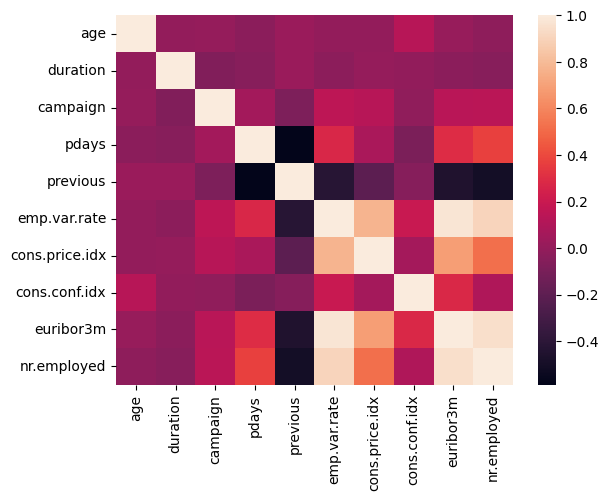

In [23]:
# Heatmap showing the relationships between different numerical features
sns.heatmap(df.corr())

In [21]:
# Numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)

Numeric Columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


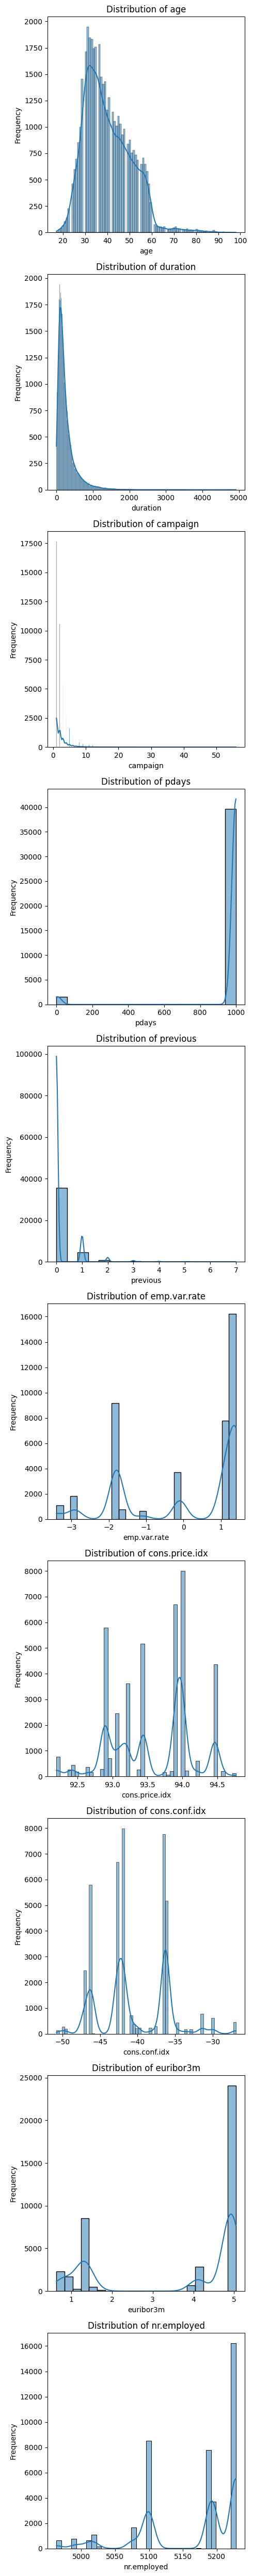

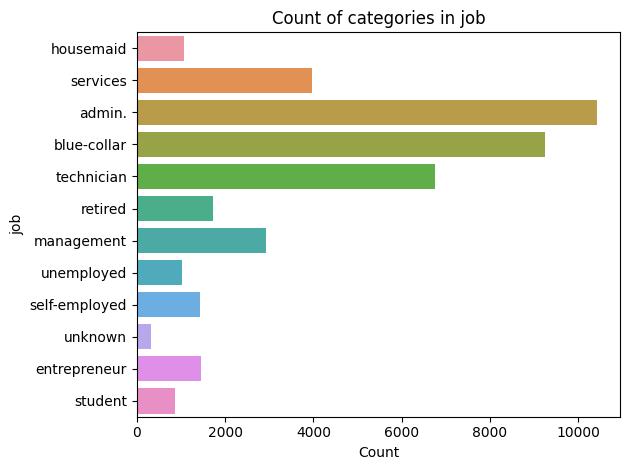

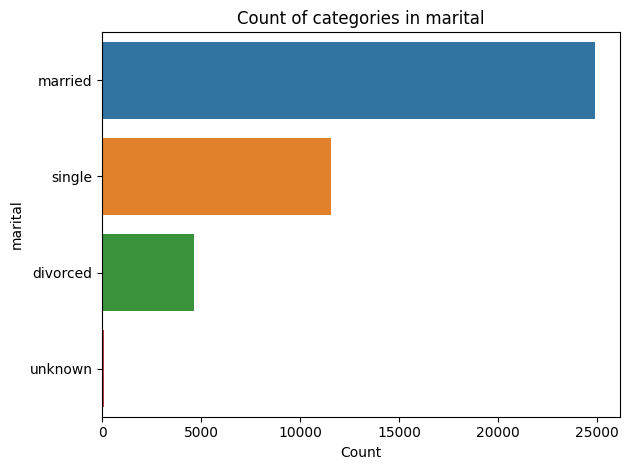

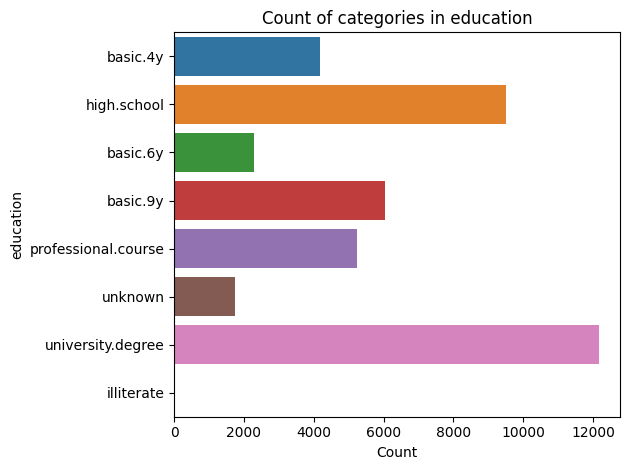

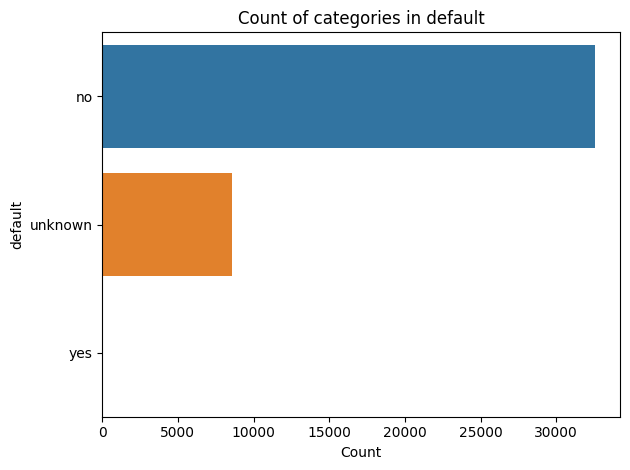

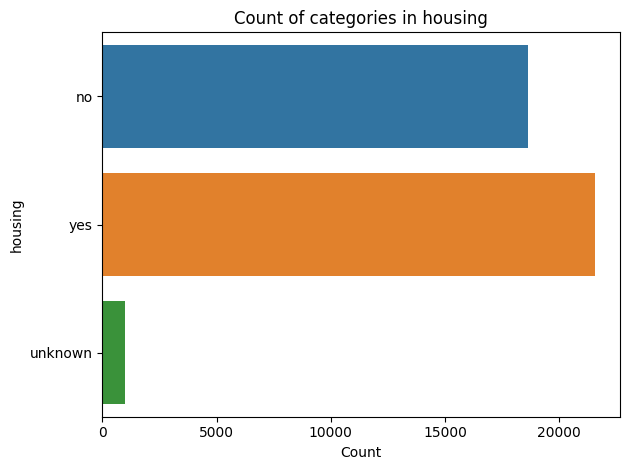

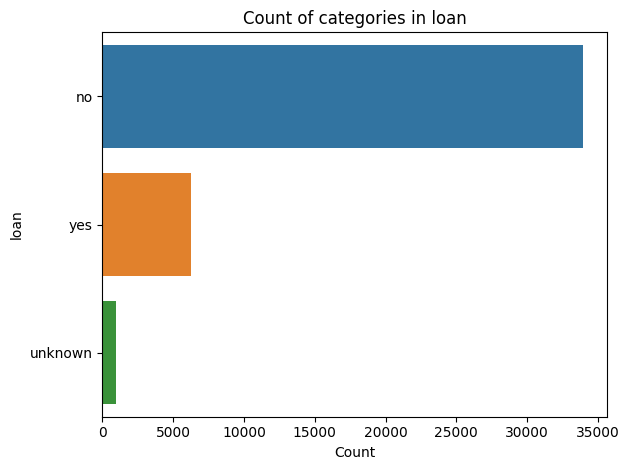

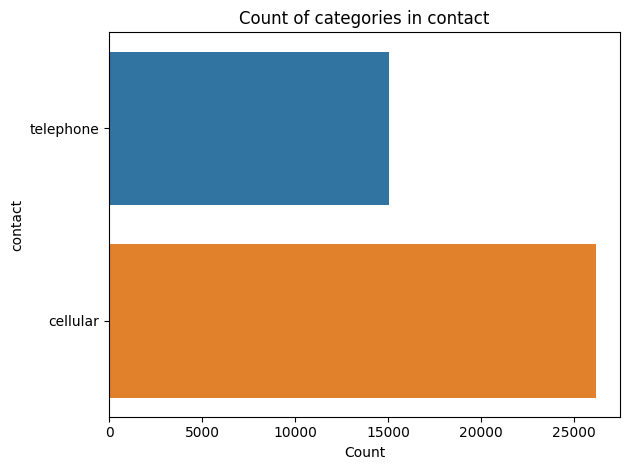

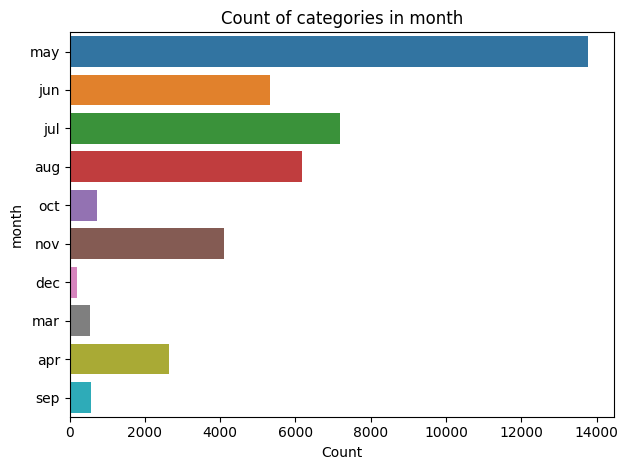

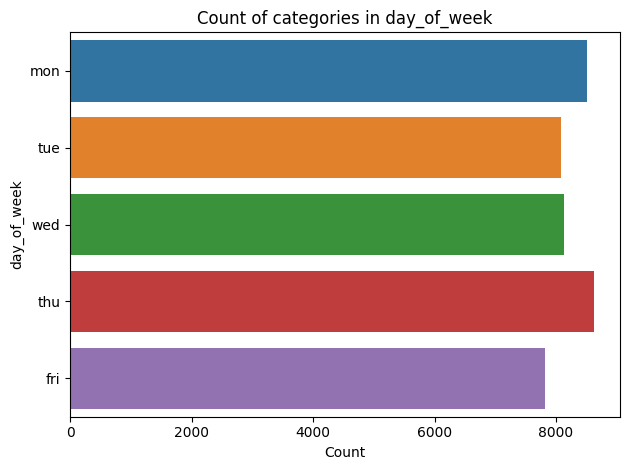

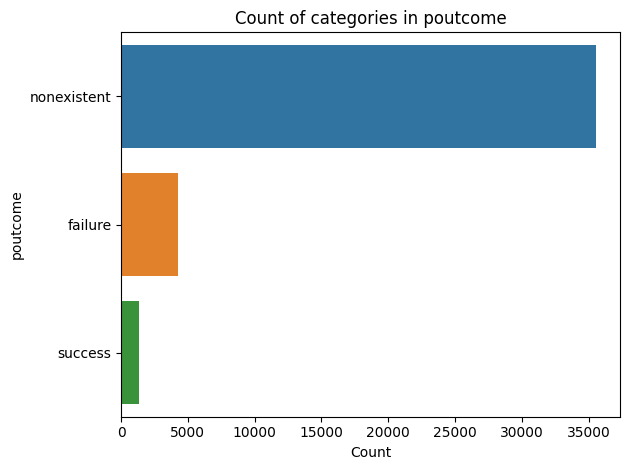

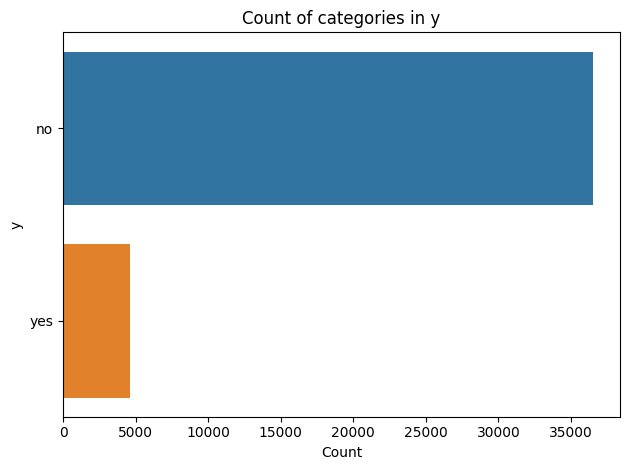

In [22]:
# Charts showing histograms for numeric columns, and bar plots for categorical columns
import matplotlib.pyplot as plt
import seaborn as sns


# Setting up the figure and axes
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(5, 5*len(numeric_columns)))

# Plotting histograms for numeric columns
for ax, col in zip(axes, numeric_columns):
    sns.histplot(df[col], ax=ax, kde=True)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plotting bar plots for categorical columns
for col in categorical_columns:
    plt.figure()
    sns.countplot(y=df[col])
    plt.title(f'Count of categories in {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


In [34]:
# Assuming df is your DataFrame
X = df.drop(columns='y')
y = df['y']
X,y

(       age          job  marital            education  default housing loan  \
 0       56    housemaid  married             basic.4y       no      no   no   
 1       57     services  married          high.school  unknown      no   no   
 2       37     services  married          high.school       no     yes   no   
 3       40       admin.  married             basic.6y       no      no   no   
 4       56     services  married          high.school       no      no  yes   
 ...    ...          ...      ...                  ...      ...     ...  ...   
 41183   73      retired  married  professional.course       no     yes   no   
 41184   46  blue-collar  married  professional.course       no      no   no   
 41185   56      retired  married    university.degree       no     yes   no   
 41186   44   technician  married  professional.course       no      no   no   
 41187   74      retired  married  professional.course       no     yes   no   
 
          contact month day_of_week  d

In [39]:
categorical_cols = categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

ct = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_columns),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)  # drop one category to avoid multicollinearity
])


In [40]:
X_transformed = ct.fit_transform(X)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [51]:
# Lets fit and compare several classification models for this question

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC  # SVC (Support Vector Classifier) is the classification counterpart of SVR
import time


# (k-nearest neighbors, logistic regression, decision trees, and support vector machines)
# models = { #regression models
#     'LogisticRegression': LogisticRegression(),
#     'KNeighborsRegressor': KNeighborsRegressor(),
#     'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
#     'Ridge': Ridge(),
#     'SVR': SVR()
# }

models = { #classifier models
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'RidgeClassifier': RidgeClassifier(),
    'SVC': SVC()
}

# Train and evaluate each model
model_scores = {}
model_times = {}  # Dictionary to store the time taken for each model

for model_name, model in models.items():
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2)

    # Print the model name as it's being fit
    print(f"Fitting {model_name}...")

    # Start the timer
    start_time = time.time()

    # Fit the model
    model.fit(X_train, y_train)

    # Stop the timer
    end_time = time.time()

    # Calculate and store the time taken
    time_taken = end_time - start_time
    model_times[model_name] = time_taken

    # Predict the test set
    y_pred = model.predict(X_test)

     # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Save the results
    model_scores[model_name] = accuracy

# Print the results
print("Accuracies:", model_scores)
print("Training times (in seconds):", model_times)

Fitting LogisticRegression...
Fitting KNeighborsClassifier...
Fitting DecisionTreeClassifier...
Fitting RidgeClassifier...
Fitting SVC...
Accuracies: {'LogisticRegression': 0.907623209516873, 'KNeighborsClassifier': 0.9027676620538966, 'DecisionTreeClassifier': 0.8951201747997086, 'RidgeClassifier': 0.9118718135469774, 'SVC': 0.9081087642631707}
Training times (in seconds): {'LogisticRegression': 0.8955416679382324, 'KNeighborsClassifier': 0.07619047164916992, 'DecisionTreeClassifier': 0.3731656074523926, 'RidgeClassifier': 0.13731098175048828, 'SVC': 27.963144063949585}


In [56]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
import time
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC  # SVC (Support Vector Classifier) is the classification counterpart of SVR


models = { #classifier models
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'RidgeClassifier': RidgeClassifier(),
    'SVC': SVC()
}

# Create dictionaries to store the results
model_scores = {}
model_recall = {}
model_precision = {}
model_times = {}

for model_name, model in models.items():
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2)

    # Display the name of the model being fit
    print(f"Fitting {model_name}...")

    # Record the training start time
    start_time = time.time()

    # Fit the model
    model.fit(X_train, y_train)

    # Record the training end time
    end_time = time.time()

    # Calculate and store the training time
    model_times[model_name] = end_time - start_time

    # Predict the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy, recall, and precision, and store the results
    model_scores[model_name] = accuracy_score(y_test, y_pred)
    model_recall[model_name] = recall_score(y_test, y_pred, average='weighted')
    model_precision[model_name] = precision_score(y_test, y_pred, average='weighted')

# Print the results
print("Accuracy scores:", model_scores)
print("Recall scores:", model_recall)
print("Precision scores:", model_precision)
print("Training times:", model_times)


Fitting LogisticRegression...
Fitting KNeighborsClassifier...
Fitting DecisionTreeClassifier...
Fitting RidgeClassifier...
Fitting SVC...
Accuracy scores: {'LogisticRegression': 0.9142995872784656, 'KNeighborsClassifier': 0.9015537751881525, 'DecisionTreeClassifier': 0.8885651857246905, 'RidgeClassifier': 0.9089584850691915, 'SVC': 0.909686817188638}
Recall scores: {'LogisticRegression': 0.9142995872784656, 'KNeighborsClassifier': 0.9015537751881525, 'DecisionTreeClassifier': 0.8885651857246905, 'RidgeClassifier': 0.9089584850691915, 'SVC': 0.909686817188638}
Precision scores: {'LogisticRegression': 0.9040617646385444, 'KNeighborsClassifier': 0.8908054008043566, 'DecisionTreeClassifier': 0.8873496030591667, 'RidgeClassifier': 0.8955811005856036, 'SVC': 0.8984289816224998}
Training times: {'LogisticRegression': 1.1113202571868896, 'KNeighborsClassifier': 0.08606600761413574, 'DecisionTreeClassifier': 0.49856019020080566, 'RidgeClassifier': 0.2495410442352295, 'SVC': 27.76265597343445}


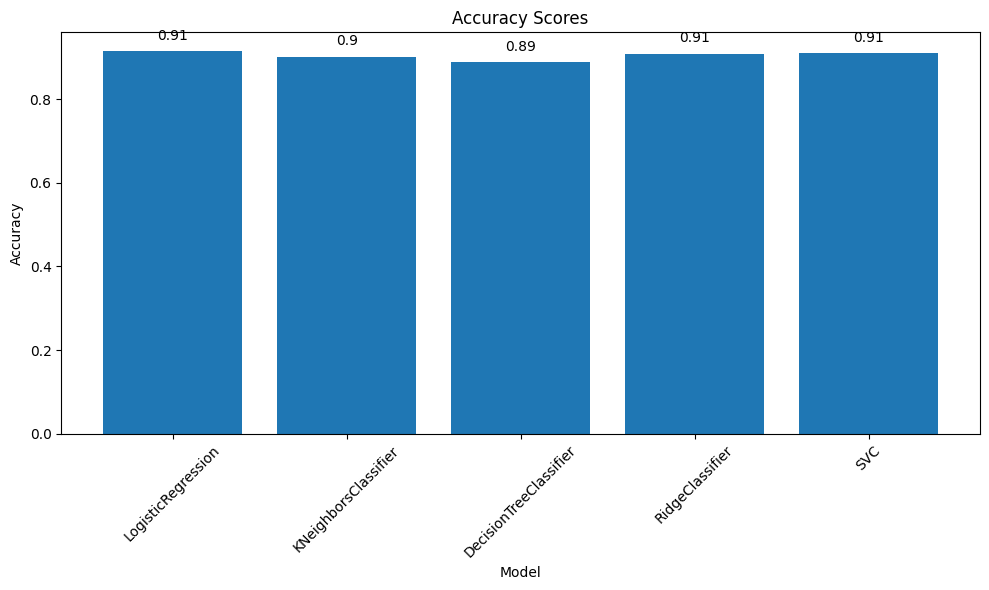

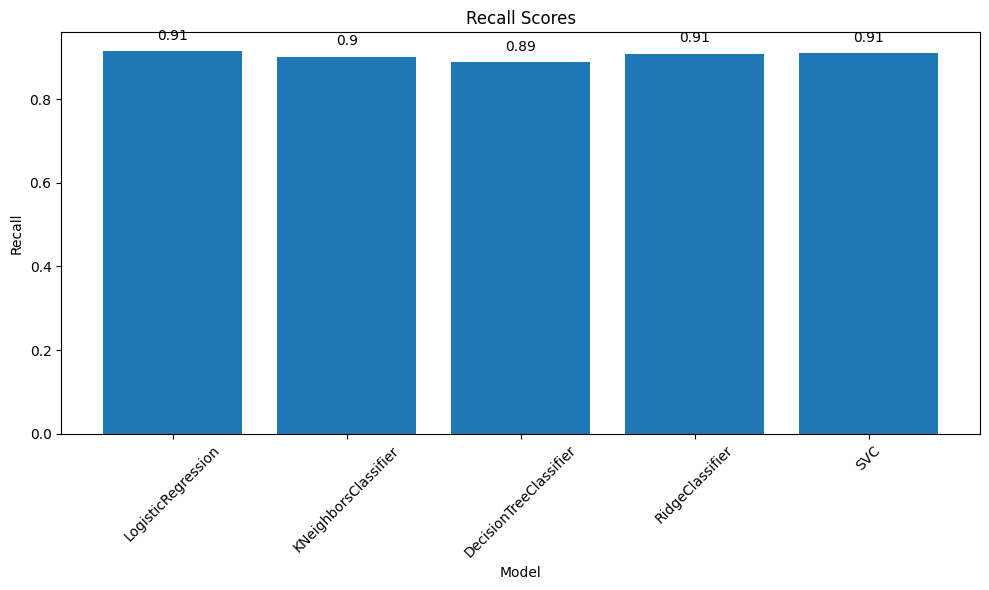

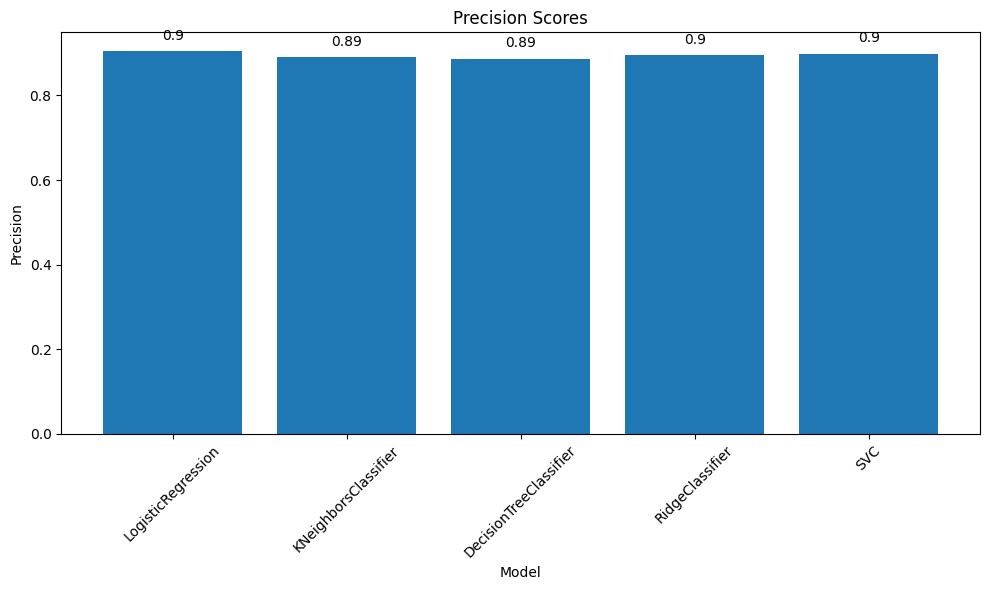

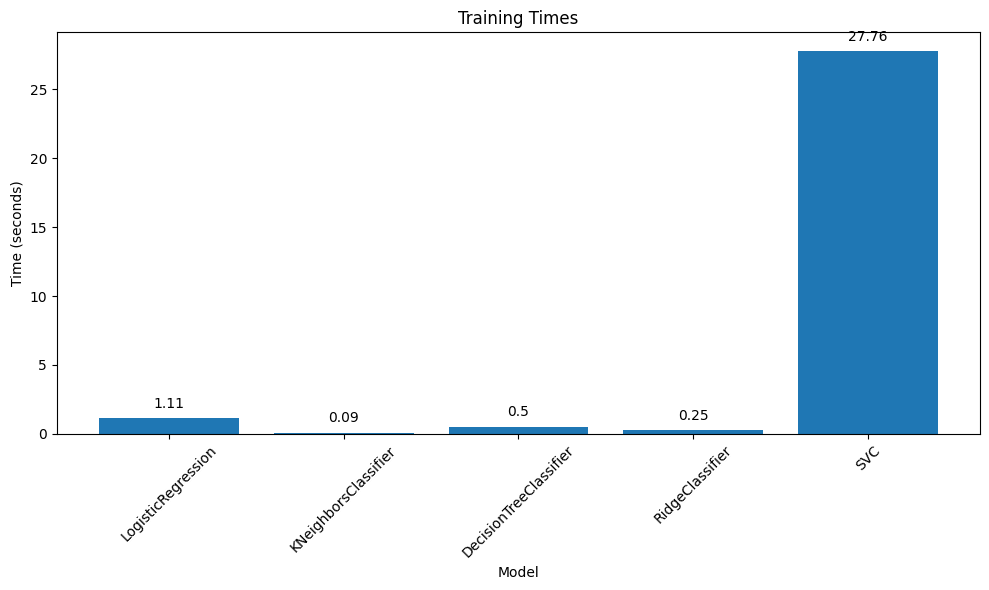

In [81]:
#Lets create separate bar plots showing the scores and training time for each model:
def plot_bar_chart(data, title, ylabel):
    plt.figure(figsize=(10, 6))
    plt.bar(data.keys(), data.values())
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    for i, (k, v) in enumerate(data.items()):
        plt.text(i, v + max(0.02 * max(data.values()), 0.02), round(v, 2), ha='center', va='bottom')

    # Save the plot as an image
    filename = title.replace(" ", "_").lower() + ".png"
    plt.tight_layout()
    plt.savefig(f"drive/MyDrive/Colab Notebooks/Module17/images/{filename}")
    plt.show()

plot_bar_chart(model_scores, 'Accuracy Scores', 'Accuracy')
plot_bar_chart(model_recall, 'Recall Scores', 'Recall')
plot_bar_chart(model_precision, 'Precision Scores', 'Precision')
plot_bar_chart(model_times, 'Training Times', 'Time (seconds)')


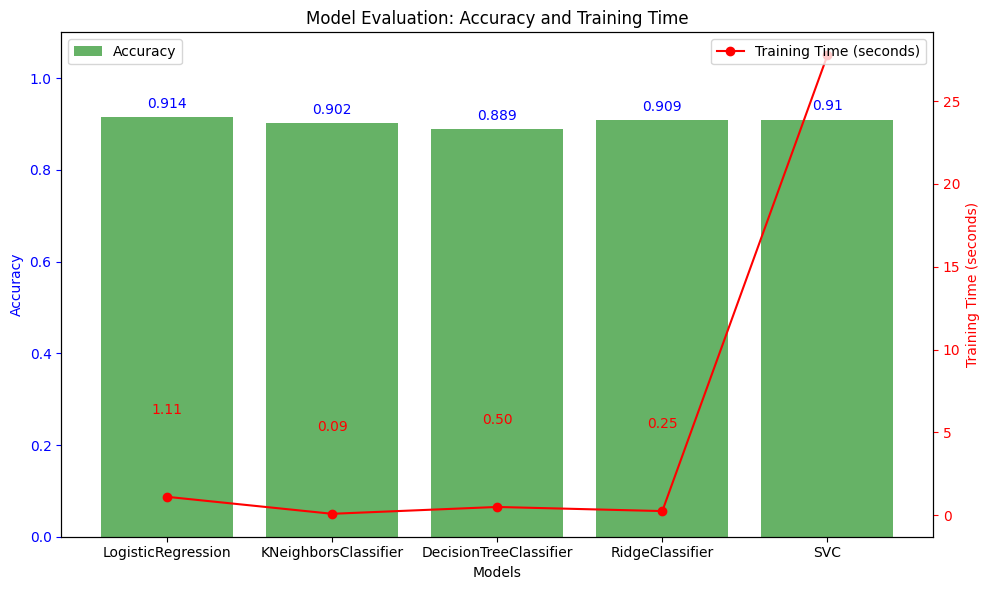

In [78]:
# Create the initial bar chart for accuracy scores
fig, ax1 = plt.subplots(figsize=(10, 6))

# Make the bar chart for accuracy scores
bars = ax1.bar(model_scores.keys(), model_scores.values(), color='g', label='Accuracy', alpha=0.6)
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy', color='b')
ax1.tick_params('y', colors='b')
ax1.set_ylim([0, 1.1])  # assuming accuracy is between 0 and 1, with a little extra for labels

# Adding data labels for accuracy
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 3), ha='center', color='b')

# Create the second y-axis to represent the training times
ax2 = ax1.twinx()
line, = ax2.plot(model_times.keys(), model_times.values(), color='r', marker='o', label='Training Time (seconds)')
ax2.set_ylabel('Training Time (seconds)', color='r')
ax2.tick_params('y', colors='r')

# Adding data labels for training time
for i, txt in enumerate(model_times.values()):
    ax2.annotate(f"{txt:.2f}", (list(model_times.keys())[i], txt + 5), ha='center', color='r')

# Add a legend to clarify which plot represents what
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add a title and show the plot
plt.title('Model Evaluation: Accuracy and Training Time')
fig.tight_layout()
plt.savefig("drive/MyDrive/Colab Notebooks/Module17/images/accuracy_time_plot.png")
plt.show()

## **Deliverable**
After understanding, preparing, and modeling your data, build a Jupyter Notebook that includes a clear statement demonstrating your understanding of the business problem, a correct and concise interpretation of descriptive and inferential statistics, your findings (including actionable insights), and next steps and recommendations.

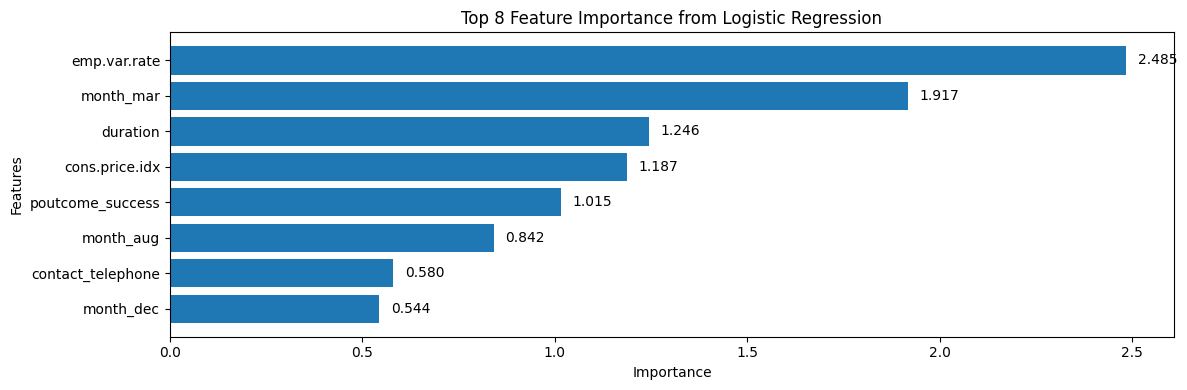

In [77]:
# Lets build a separate logistic regression model to evaluate the importance of features in predicting the response rate
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_transformed and y are your data
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2)

# Train Logistic Regression model
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

# Feature importance
importance = np.abs(lr.coef_[0])
# Get transformed feature names (especially for one-hot encoded features)
features = numeric_columns + ct.named_transformers_['cat'].get_feature_names_out(categorical_columns).tolist()

# Sort by importance and take top 8
sorted_idx = importance.argsort()[::-1][:8]  # Sort in descending order and take top 8
sorted_features = [features[i] for i in sorted_idx]
sorted_importance = importance[sorted_idx]

# Plot
plt.figure(figsize=(12, 8 * 0.5))
bars = plt.barh(sorted_features, sorted_importance)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 8 Feature Importance from Logistic Regression')
plt.gca().invert_yaxis()

# Add data labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.03,  # Move text slightly right from bar end
             bar.get_y() + bar.get_height()/2,  # Vertically center text
             f'{width:.3f}',
             va='center',
             ha='left')

plt.tight_layout()
plt.savefig("drive/MyDrive/Colab Notebooks/Module17/images/feature_importance_plot.png")
plt.show()

SUMMARY:
- All 5 models appear to have a relatively high accuracy, recall and precision at around 90% for the analyzed dataset, indication that all models are relatively appropriate to be used to predict acceptance rate
- SVC though take a much longer time to fit therefore this model can be excluded from further analysis

FEATURE IMPORTANCE:
- In terms of feature importance, the analysis shows the following:
Employment variation rate seems to have a high predictive ability relative to acceptance rate. Intuitively, employment does provide a source of income, therefore whether customers are employed or not is an important factor in accepting campaign offers
Other notable features are consumer price index (inflation rate). Again, the macro economic conditions might be a good indicator when customers will be more responsive.
Whether previous outcome was a success is also a good indicator for responsivness.

FURTHER ANALYSIS:
- This analysis was only focused on the responce rate, and not necessarily on the profitability or default probability. A good campaign will target customers who are likely to respond, provide a higher profitability to the bank, and also a low probability of default.